In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir("/home/admin123/Starspace/")
fp = "/home/admin123/Starspace/"+ "data/Online_Retail.csv"
df = pd.read_csv(fp)
df = df[-df['InvoiceNo'].str.startswith("C")]
df = df[-df['StockCode'].str.startswith("BANK")]
#req_cols = ["CustomerID", "InvoiceNo", "StockCode"]
df = df.dropna(how ='any')
df["CustomerID"] = df["CustomerID"].astype(int)
req_cols = ["CustomerID", "StockCode"]
df = df[req_cols]

In [34]:
df_inv_summary = df.groupby(["CustomerID", "StockCode"]).agg({'StockCode':['count']}).reset_index()
df_inv_summary.columns = ["CustomerID", "StockCode", "Count"]
df_inv_summary["CustomerID"] = df_inv_summary["CustomerID"].astype('category')
df_inv_summary["StockCode"] = df_inv_summary["StockCode"].astype('category')

In [31]:
n_users = len(df_inv_summary["CustomerID"].unique())
n_items = len(df_inv_summary["StockCode"].unique())

In [35]:
from scipy.sparse import coo_matrix
import numpy as np
X = coo_matrix((df_inv_summary['Count'].astype(float), 
                   (df_inv_summary['CustomerID'].cat.codes, 
                    df_inv_summary['StockCode'].cat.codes)))

In [41]:
X.data[:100]

array([1., 1., 1., 1., 4., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 5.,
       3., 1., 2., 2., 1., 1., 3., 4., 1., 1., 4., 2., 3., 6., 3., 2., 1.,
       4., 1., 3., 1., 3., 1., 1., 1., 1., 1., 2., 4., 3., 5., 3., 2., 1.,
       1., 1., 2., 1., 1., 1., 1., 2., 1., 3., 3., 1., 2., 1., 1., 1., 2.,
       1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 3.,
       1., 1., 1., 1., 5., 1., 1., 2., 1., 2., 3., 3., 1., 1., 1.])

In [49]:
from sklearn.decomposition import NMF
n_components = 5
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(X)

In [50]:
nmf.reconstruction_err_

854.0623802030015

In [52]:
 W = nmf.fit_transform(X)

In [53]:
W.shape

(4338, 5)

In [54]:
H = nmf.components_


In [55]:
H.shape

(5, 3664)

In [56]:
W[:5, 0]

array([0.00081157, 0.2528113 , 0.02310999, 0.0872074 , 0.        ])

In [59]:
from hdbscan import HDBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
import time
from sklearn.preprocessing import StandardScaler

In [60]:
hdb_t1 = time.time()
hdb = HDBSCAN(min_cluster_size=5).fit(W)
hdb_labels = hdb.labels_
hdb_elapsed_time = time.time() - hdb_t1

In [61]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_hdb_ = len(set(hdb_labels)) - (1 if -1 in hdb_labels else 0)
print('\n\n++ HDBSCAN Results')
print('Estimated number of clusters: %d' % n_clusters_hdb_)
print('Elapsed time to cluster: %.4f s' % hdb_elapsed_time)



++ HDBSCAN Results
Estimated number of clusters: 57
Elapsed time to cluster: 0.2784 s


In [62]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(W)


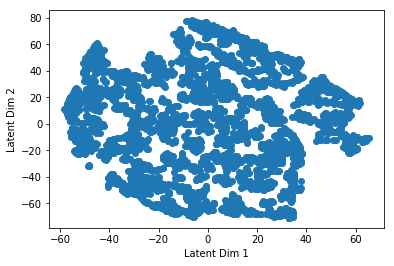

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.xlabel("Latent Dim 1")
plt.ylabel("Latent Dim 2")
plt.show()